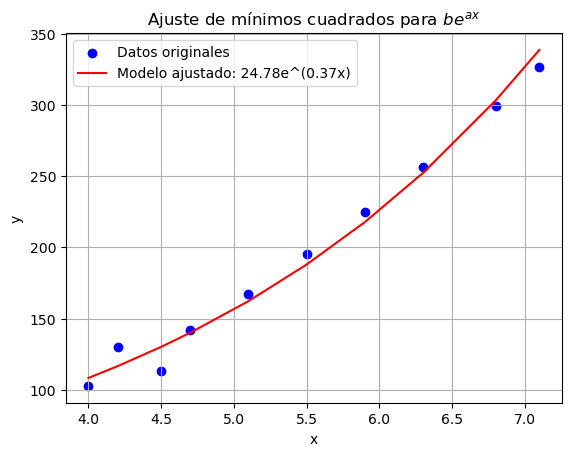

Coeficiente b: 24.7767
Coeficiente a: 0.3685
Error cuadrático medio: 82.1005


In [18]:
log_ys = np.log(ys)

# Ajuste por mínimos cuadrados (regresión lineal)
coeffs = np.polyfit(xs, log_ys, 1)  # Grado 1 porque es una línea recta
a = coeffs[0]  # Pendiente
B = coeffs[1]  # Intercepto
b = np.exp(B)  # Convertimos de log(b) a b

# Predicción con el modelo ajustado
ys_pred = b * np.exp(a * xs)

# Cálculo del error
error = np.mean((ys - ys_pred) ** 2)

# Gráfica
plt.scatter(xs, ys, color='blue', label='Datos originales')
plt.plot(xs, ys_pred, color='red', label=f'Modelo ajustado: {b:.2f}e^({a:.2f}x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de mínimos cuadrados para $be^{ax}$')
plt.legend()
plt.grid()
plt.show()

# Resultados
print(f"Coeficiente b: {b:.4f}")
print(f"Coeficiente a: {a:.4f}")
print(f"Error cuadrático medio: {error:.4f}")

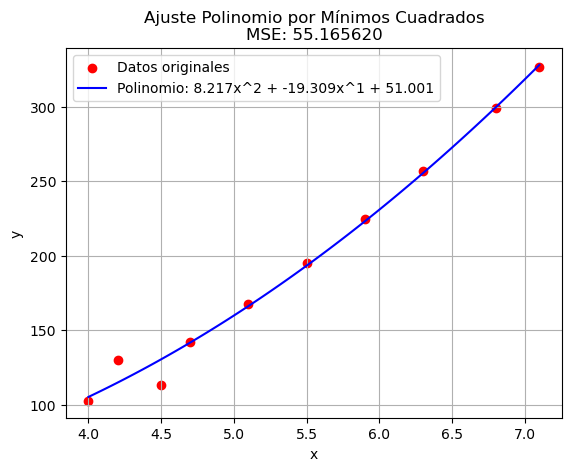

Polinomio ajustado (2º grado): 8.217x^2 + -19.309x^1 + 51.001
MSE: 55.165620


(array([  8.21707232, -19.30860379,  51.00078939]), 55.165620011702345)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def ajuste_polinomio(xs, ys, grado, tipo):
    # Ajuste del polinomio
    coeficientes = np.polyfit(xs, ys, grado)
    polinomio = np.poly1d(coeficientes)
    ys_pred = polinomio(xs)
    mse = np.mean((ys - ys_pred) ** 2)
    
    # Crear la representación del polinomio como texto
    # polinomio_texto = " + ".join(f"{coef:.3f}x^{grado - i}" if grado - i > 0 else f"{coef:.3f}" for i, coef in enumerate(coeficientes))
    for i, coef in enumerate(coeficientes):
        exponente = grado - i
        if exponente > 0:
            termino = f"{coef:.3f}x^{exponente}"
        else:
            # Término constante (sin x)
            termino = f"{coef:.3f}"
        
        # Agregar el término a la lista
        polinomio_texto.append(termino)
    
    # Unir los términos con " + " para formar el polinomio completo
    polinomio_texto = " + ".join(polinomio_texto)
    
    # Gráfica
    plt.scatter(xs, ys, label="Datos originales", color="red")
    x_graf = np.linspace(min(xs), max(xs), 100)
    plt.plot(x_graf, polinomio(x_graf), label=f"{tipo}: {polinomio_texto}", color="blue")
    plt.title(f"Ajuste {tipo} por Mínimos Cuadrados\nMSE: {mse:.6f}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()
    plt.show()

    # Imprimir el polinomio en consola
    print(f"Polinomio ajustado ({grado}º grado): {polinomio_texto}")
    print(f"MSE: {mse:.6f}")

    return coeficientes, mse

# Ejemplo de uso
xs = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
ys = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Ajuste de un polinomio de grado 2
ajuste_polinomio(xs, ys, grado=2, tipo="Polinomio")


Ajuste de la forma b * e^x:


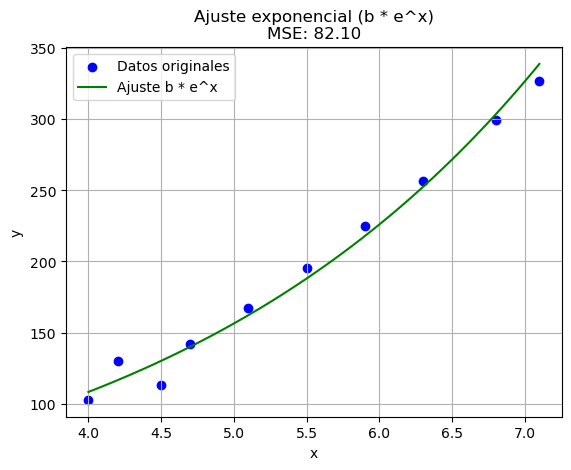

Ajuste de la forma b * x^m:


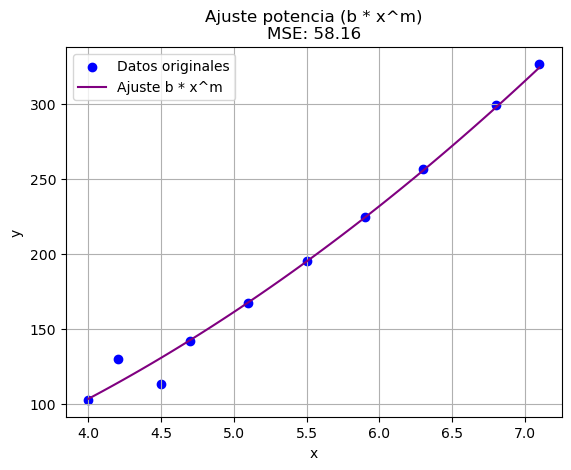

In [22]:
# d. Ajuste exponencial b * e^x
print("Ajuste de la forma b * e^x:")
log_ys = np.log(ys)
coef_exp = np.polyfit(xs, log_ys, 1)
b_exp = np.exp(coef_exp[1])
m_exp = coef_exp[0]

ys_pred_exp = b_exp * np.exp(m_exp * xs)
mse_exp = np.mean((ys - ys_pred_exp) ** 2)

# Gráfica
plt.scatter(xs, ys, label="Datos originales", color="blue")
x_graf = np.linspace(min(xs), max(xs), 100)
plt.plot(x_graf, b_exp * np.exp(m_exp * x_graf), label="Ajuste b * e^x", color="green")
plt.title(f"Ajuste exponencial (b * e^x)\nMSE: {mse_exp:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# e. Ajuste de la forma b * x^m
print("Ajuste de la forma b * x^m:")
log_xs = np.log(xs)
log_ys = np.log(ys)
coef_power = np.polyfit(log_xs, log_ys, 1)
b_power = np.exp(coef_power[1])
m_power = coef_power[0]

ys_pred_power = b_power * xs**m_power
mse_power = np.mean((ys - ys_pred_power) ** 2)

# Gráfica
plt.scatter(xs, ys, label="Datos originales", color="blue")
x_graf = np.linspace(min(xs), max(xs), 100)
plt.plot(x_graf, b_power * x_graf**m_power, label="Ajuste b * x^m", color="purple")
plt.title(f"Ajuste potencia (b * x^m)\nMSE: {mse_power:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()
